In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

#reading the data into pandas
student_math = pd.read_csv('C:/Users/rl893/Documents/personal info/priya_assgn/task2/student-math.csv',sep = ';',quotechar = '"')


In [2]:
#printing head
student_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
#printing table information (variables,datatypes)
student_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [4]:
#storing catagorical columns
cat_cols = student_math.select_dtypes(include=['object']).columns

In [5]:
cat_cols

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [6]:

#onehotencoding of categorical columns
encoder=OneHotEncoder(sparse=False)
df_encoded = pd.DataFrame()
for i in cat_cols:
    df=pd.DataFrame()
    df = pd.DataFrame (encoder.fit_transform(student_math[[i]]))
    df.columns = encoder.get_feature_names([i])
    df_encoded = pd.concat([df_encoded, df], axis=1)


In [7]:
#concatenating original data with onehotencoded data
student_math_oneHot = pd.concat([student_math, df_encoded], axis=1)

In [8]:
#Deleting categorical columns
for i in cat_cols:
    del student_math_oneHot[i]

In [9]:
#printing the statistics of the columns
student_math_oneHot.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,...,0.491139,0.508861,0.205063,0.794937,0.050633,0.949367,0.167089,0.832911,0.665823,0.334177
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,...,0.500555,0.500555,0.404260,0.404260,0.219525,0.219525,0.373528,0.373528,0.472300,0.472300
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
student_math_oneHot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 59 columns):
age                  395 non-null int64
Medu                 395 non-null int64
Fedu                 395 non-null int64
traveltime           395 non-null int64
studytime            395 non-null int64
failures             395 non-null int64
famrel               395 non-null int64
freetime             395 non-null int64
goout                395 non-null int64
Dalc                 395 non-null int64
Walc                 395 non-null int64
health               395 non-null int64
absences             395 non-null int64
G1                   395 non-null int64
G2                   395 non-null int64
G3                   395 non-null int64
school_GP            395 non-null float64
school_MS            395 non-null float64
sex_F                395 non-null float64
sex_M                395 non-null float64
address_R            395 non-null float64
address_U            395 non-null float64
fam

In [11]:
#creating target column
student_math_oneHot["final_grade"] = student_math_oneHot.apply(lambda x: x.G1 + x.G2 + x.G3, axis=1)

In [12]:
#preparing exogenous and endogenous values
X = student_math_oneHot.drop(["final_grade","G3"],axis=1).values
y =student_math_oneHot["final_grade"].values

In [13]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
#fitting linear regression model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#Accuracy of the model
print('Accuracy of linear regression on test set: {:.2f}'.format(regressor.score(X_test, y_test)))


Accuracy of linear regression on test set: 0.96


In [16]:
#predicting target values
y_pred = regressor.predict(X_test)

In [17]:
#Model evaluation metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.6102186758306962
Mean Squared Error: 5.844834287709828
Root Mean Squared Error: 2.4176092090554726


In [18]:
#dataframe of actual value & predicted value
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,42.0,42.188232
1,32.0,32.729980
2,28.0,28.395264
3,46.0,46.545166
4,47.0,47.562256
...,...,...
74,28.0,31.765381
75,16.0,24.868408
76,31.0,30.730225
77,53.0,52.704834


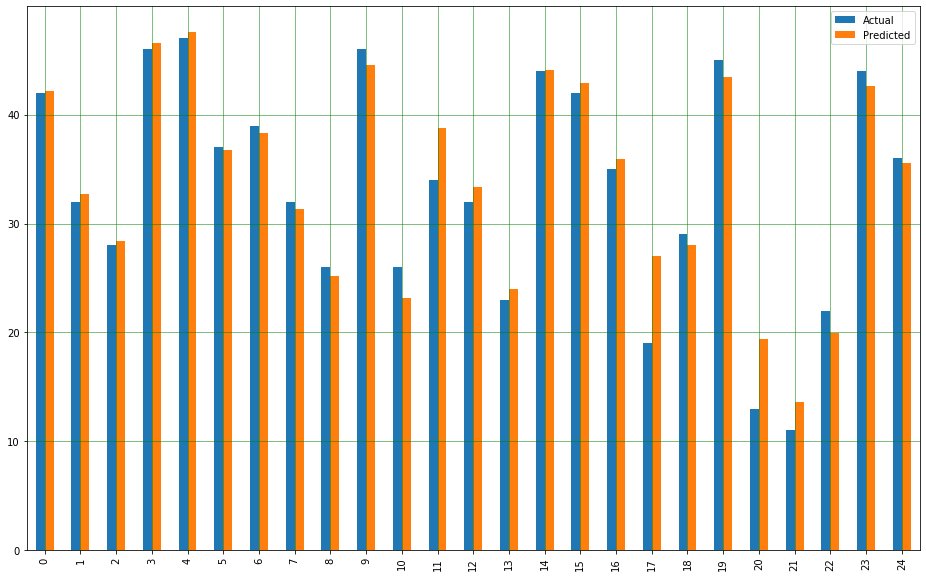

In [19]:
#bar chart of actual with predicted

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

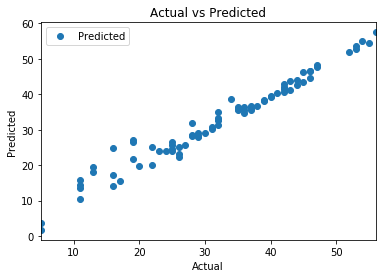

In [20]:
#scatter plot of actual with predicted
df.plot(x='Actual', y='Predicted', style='o')  
plt.title('Actual vs Predicted')  
plt.xlabel('Actual')  
plt.ylabel('Predicted')  
plt.show()

In [21]:
# building the optimal model using backward elimination
# SL = 0.05 and eliminating those features which have p-value > SL
import statsmodels.regression.linear_model as sm 
X = np.append(arr = np.ones((395,1)).astype(int), values = X, axis = 1)

In [22]:
sigLevel = 0.05
X_opt = X[:,np.arange(0,X.shape[1]).tolist()]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
pVals = regressor_OLS.pvalues
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     318.5
Date:                Sun, 31 May 2020   Prob (F-statistic):          3.24e-253
Time:                        00:36:23   Log-Likelihood:                -791.99
No. Observations:                 395   AIC:                             1668.
Df Residuals:                     353   BIC:                             1835.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0860      0.237     -0.362      0.717      -0.553       0.381
x1            -0.1733      0.101     -1.720      0.086      -0.372       0.025
x2             0.1297      0.150      0.865      0.388      -0.165       0.425
x3            -0.1339      0.129     -1.040      0.299      -0.387       0.119
x4             0.0970      0.158      0.615      0.539      -0.213       0.407
x5            -0.1048      0.135     -0.777      0.438      -0.370       0.160
x6            -0.1605      0.161     -0.997      0.319      -0.477       0.156
x7             0.3569      0.114      3.127      0.002       0.132       0.581
x8             0.0470      0.110      0.426      0.670      -0.170       0.264
x9             0.0120      0.105      0.114      0.909      -0.195       0.219
x10           -0.1850      0.153     -1.208      0.228      -0.486       0.116
x11            0.1768      0.115      1.538      0.125      -0.049       0.403
x12            0.0630      0.075      0.842      0.400      -0.084       0.210
x13            0.0459      0.013      3.421      0.001       0.020       0.072
x14            1.1888      0.062     19.060      0.000       1.066       1.312
x15            1.9573      0.053     36.613      0.000       1.852       2.062
x16           -0.2834      0.179     -1.581      0.115      -0.636       0.069
x17            0.1974      0.251      0.785      0.433      -0.297       0.692
x18           -0.1302      0.163     -0.801      0.424      -0.450       0.190
x19            0.0442      0.170      0.259      0.795      -0.291       0.379
x20           -0.0952      0.189     -0.503      0.615      -0.468       0.277
x21            0.0092      0.170      0.054      0.957      -0.325       0.344
x22           -0.0613      0.163     -0.377      0.706      -0.381       0.258
x23           -0.0248      0.166     -0.149      0.881      -0.351       0.301
x24            0.0208      0.208      0.100      0.920      -0.389       0.431
x25           -0.1069      0.203     -0.527      0.598      -0.505       0.292
x26           -0.0069      0.287     -0.024      0.981      -0.572       0.558
x27           -0.1533      0.320     -0.478      0.633      -0.783       0.477
x28            0.0672      0.197      0.341      0.734      -0.321       0.455
x29            0.0401      0.198      0.203      0.840      -0.349       0.429
x30           -0.0332      0.284     -0.117      0.907      -0.591       0.525
x31            0.0202      0.392      0.052      0.959      -0.751       0.792
x32            0.3512      0.407      0.863      0.389      -0.449       1.151
x33           -0.0634      0.214     -0.297      0.767      -0.484       0.357
x34           -0.3019      0.223     -1.351      0.178      -0.741       0.138
x35           -0.0921      0.355     -0.260      0.795      -0.790       0.605
x3

In [23]:
while pVals[np.argmax(pVals)] > sigLevel:
     X_opt = np.delete(X_opt, np.argmax(pVals), axis = 1)    
     print("pval of dim removed: " + str(np.argmax(pVals)))
     print(str(X_opt.shape[1]) + " dimensions remaining...")
     regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
     pVals = regressor_OLS.pvalues

pval of dim removed: 26
58 dimensions remaining...
pval of dim removed: 47
57 dimensions remaining...
pval of dim removed: 21
56 dimensions remaining...
pval of dim removed: 29
55 dimensions remaining...
pval of dim removed: 28
54 dimensions remaining...
pval of dim removed: 23
53 dimensions remaining...
pval of dim removed: 22
52 dimensions remaining...
pval of dim removed: 9
51 dimensions remaining...
pval of dim removed: 47
50 dimensions remaining...
pval of dim removed: 20
49 dimensions remaining...
pval of dim removed: 25
48 dimensions remaining...
pval of dim removed: 26
47 dimensions remaining...
pval of dim removed: 18
46 dimensions remaining...
pval of dim removed: 35
45 dimensions remaining...
pval of dim removed: 0
44 dimensions remaining...
pval of dim removed: 37
43 dimensions remaining...
pval of dim removed: 39
42 dimensions remaining...
pval of dim removed: 30
41 dimensions remaining...
pval of dim removed: 28
40 dimensions remaining...
pval of dim removed: 27
39 dimens

In [24]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          2.565e+04
Date:                Sun, 31 May 2020   Prob (F-statistic):                        0.00
Time:                        00:36:23   Log-Likelihood:                         -806.99
No. Observations:                 395   AIC:                                      1624.
Df Residuals:                     390   BIC:                                      1644.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2057      0.030     -6.917      0.000      -0.264      -0.147
x2             0.3557      0.103      3.466      0.001       0.154       0.558
x3             0.0437      0.012      3.650      0.000       0.020       0.067
x4             1.1580      0.055     21.070      0.000       1.050       1.266
x5             1.9775      0.048     41.140      0.000       1.883       2.072
==============================================================================
Omnibus:                      216.173   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1265.752
Skew:                          -2.361   Prob(JB):                    1.40e-275
Kurtosis:                      10.390   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Optimized training and test sets
y_opt = y
X_train, X_test, y_train, y_test = train_test_split(X_opt, y_opt, test_size=0.2, random_state=0)

In [26]:
#fitting linear regression model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#Accuracy of the model
print('Accuracy of linear regression on test set: {:.2f}'.format(regressor.score(X_test, y_test)))

Accuracy of linear regression on test set: 0.97


In [28]:
#predicting target values
y_pred = regressor.predict(X_test)

In [29]:
#Model evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.3934764142640716
Mean Squared Error: 5.291720423625014
Root Mean Squared Error: 2.300373974732155


In [30]:
#dataframe of actual value & predicted value
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,42.0,41.981039
1,32.0,32.432896
2,28.0,28.453617
3,46.0,46.590089
4,47.0,47.235854
...,...,...
74,28.0,31.198433
75,16.0,24.018603
76,31.0,30.835834
77,53.0,52.564430


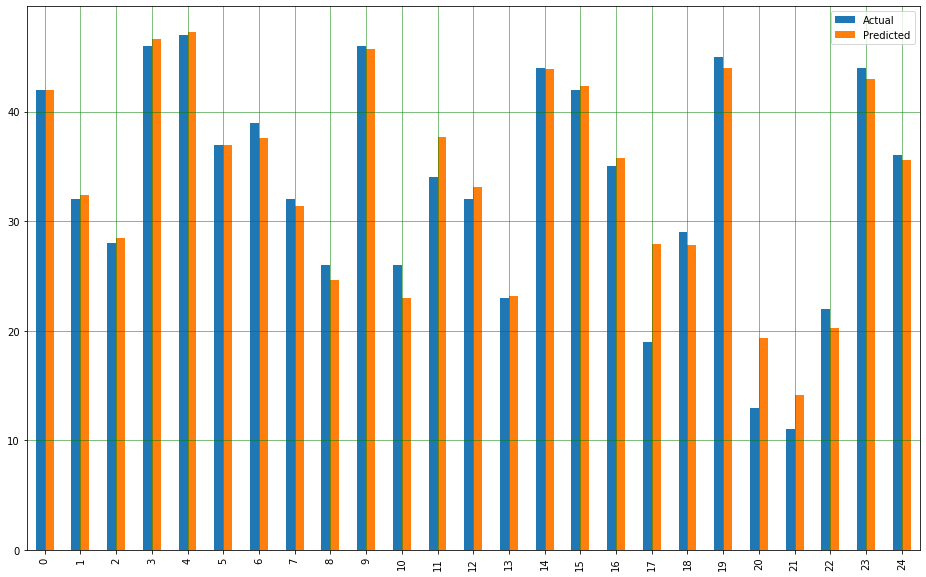

In [31]:
#barplot of actual with predcited
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

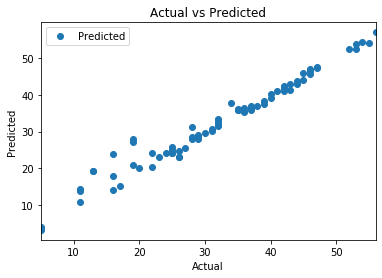

In [32]:
#scatter plot of actual with predicted
df.plot(x='Actual', y='Predicted', style='o')  
plt.title('Actual vs Predicted')  
plt.xlabel('Actual')  
plt.ylabel('Predicted')  
plt.show()